Introduction to Basic Probability and Statistics - Distributions, Sampling, and Expectations 
<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Intro to Basic Probability and Statistics: Distributions, Sampling, and Expectations.</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM 421, Spring 2024
Instructor: Brian Munsky
Authors: Huy Vo, Ania Baetica, Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



![alt text](figures/image0.png)

In [1]:
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt
import numpy.random as rng
import scipy.stats as stats
# Uncomment the following the first time if you do not have seaborn installed:
#!pip install seaborn
import seaborn as sns
from typing import Union # for code annotation


# Random Numbers
![alt text](figures/image.png)

A random variable is a quantity $X$ whose precise value is _uncertain_. For example, the number of cells in the next microscope field of view you image or the height of the first person you see on the street tomorrow are random variables.

If $X$ can only take integer values $0,1,2,\ldots$ we say that $X$ is a __discrete random variable__. If $X$ can take the whole range of real values in $\mathbb{R}$, we say that $X$ is a __continuous random variable__. There are random variables that can behave discretely in some domain and continuously in others, but for the purpose of the summer school we will only focus on these two types.

# Probability Distributions

## Probability Mass Functions and Probability Density Functions
![alt text](figures/image-1.png)

When $X$ is discrete, the __probability mass function__ (PMF) of $X$ gives us the probability for it to take on each possible specific value $n=0,1,2,\ldots$:
$$
p_{X}(n) = \mathrm{Pr}\left(X = n\right).
$$

When $X$ is continuous, we are interested in the __probability density function__ (PDF) of $X$, defined as a function $f_X(x)$ taking nonnegative values such that
$$
\int_a^b{f_X(x)\mathrm{dx}} = \mathrm{Pr}(a \leq X \leq b).
$$

## Cumulative Probability Distribution
![alt text](figures/image-2.png)


## Common Discrete Distrbutions
There are several discrete distributions that we will encounter in this class.  The most important are Bernoulli, Binomial, and Poisson.

### Bernoulli Distribution
![alt text](figures/image-4.png)
The Bernoulli distribution is used to model a binary reponse $Y$ that, without loss of generality, we assume to be either $0$ or $1$. Its probability mass function is given by
$$
\mathrm{Ber}\left(y\vert \theta\right)
:=
\begin{cases}
1-\theta \;\;\text{if }y=0\\
\theta \;\;\text{if }y=1
\end{cases}
$$
where $\theta$ is the parameter of the distribution. This parameter has the clear interpretation as the probability for $Y$ to take value $1$. You can use this distribution to model a _single occurence_ of a trial that has binary outcomes, such as the a single coin flip.

The Bernoulli distribution is important for understanding binary classification (e.g., in machine learning).

* What is the mean of a Bernoulli random variable?

* What is it's standard deviation?

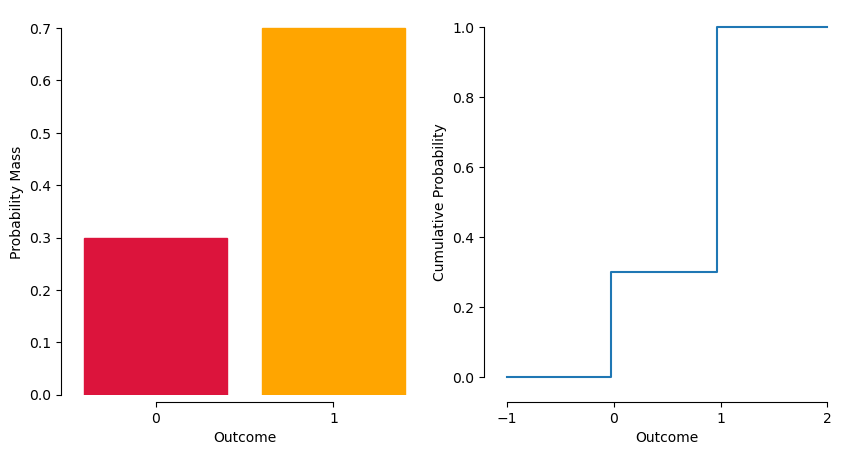

In [2]:
# Example for using Bernoulli random variables
from scipy.stats import bernoulli

theta = 0.7  # probability of success - change this value to see the effect

# Create a Bernoulli random variable
ber_rv = bernoulli(p = theta)

# Make two plots to show the PMF and the CDF:
# The first one is a bar chart of the probability mass function, 
fig, ax = plt.subplots(1,2, figsize=(10, 5))
bplot = ax[0].bar([0, 1], ber_rv.pmf([0, 1]))
ax[0].set_xticks([0, 1])
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Mass")
sns.despine(offset=5, trim=True)
for i, bar in enumerate(bplot):
  bar.set_color("crimson") if i == 0 else bar.set_color("orange")

# The second one is a stair plot of the cumulative distribution function
x = np.linspace(-1, 2, 100)
ax[1].step(x, ber_rv.cdf(x))
ax[1].set_xticks([-1, 0, 1, 2])
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

### Binomial Distribution
![alt text](figures/image-5.png)

Let $S = X_1 + X_2 + \ldots + X_n$ where $n$ is a fixed integer and $X_1,\ldots, X_n$ are __independent__ random variables that are distributed according to the Bernoulli distribution with the __same__ parameter $p$. Then $S$ will be a discrete random variable with a __Binomial Distribution__ with parameters $n$ and $p$, and we write $S\sim \mathrm{Binomial}(n;p)$. It has the probability mass function
$$
\mathrm{Pr}(S = y) = \mathrm{Binomial}(y \vert n, p) := \left(\begin{array}{c} y\\n \end{array} \right) p^y(1-p)^{1-y}.
$$

Here
$$
\left(\begin{array}{c} y\\n \end{array} \right)  := \frac{
    n!
}{
    (n-y)!y!
}
$$
is pronounced "_n choose y_" and is the total number of ways to take $y$ objects without replacement from a set of $n$ objects.

The binomial distribution models the number of heads you get when flipping a coin $n$ times, where the probability of getting head in each flip is p. It could also model the probability distribution for how many cells will have a given phenotype when you measure $n$ total cells and the phenotype probability is $p$.

* What is the mean of a Binomial random variable?
* What is the variance and standard deviation?

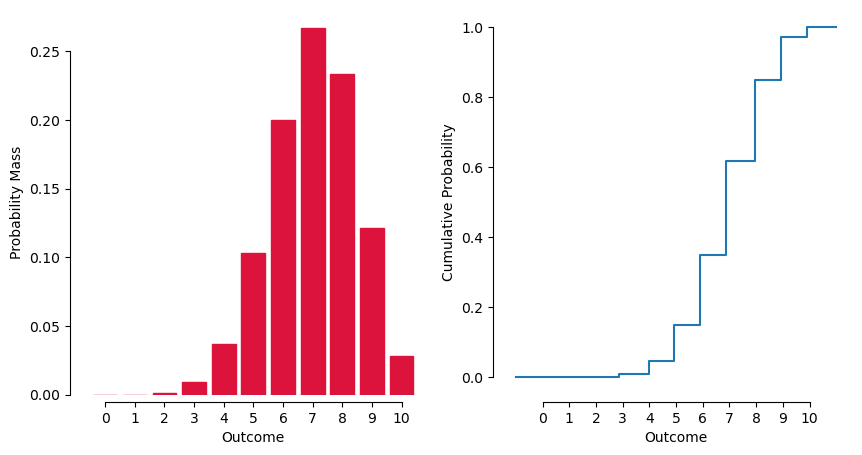

In [3]:
# Example for using Binomial random variables
from scipy.stats import binom

n = 10  # number of trials - change this value to see the effect
p = 0.7  # probability of success - change this value to see the effect

# Create a Binomial random variable
bin_rv = binom(n = n, p = p)

# Make two plots to show the PMF and the CDF:
# The first one is a bar chart of the probability mass function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
bplot = ax[0].bar(range(n+1), bin_rv.pmf(range(n+1)))
ax[0].set_xticks(range(n+1))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Mass")
sns.despine(offset=5, trim=True)
for i, bar in enumerate(bplot):
  bar.set_color("crimson")

# The second one is a stair plot of the cumulative distribution function
x = np.linspace(-1, n+1, 100)
ax[1].step(x, bin_rv.cdf(x))
ax[1].set_xticks(range(n+1))
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

### Poisson Distribution
![alt text](figures/image-7.png)

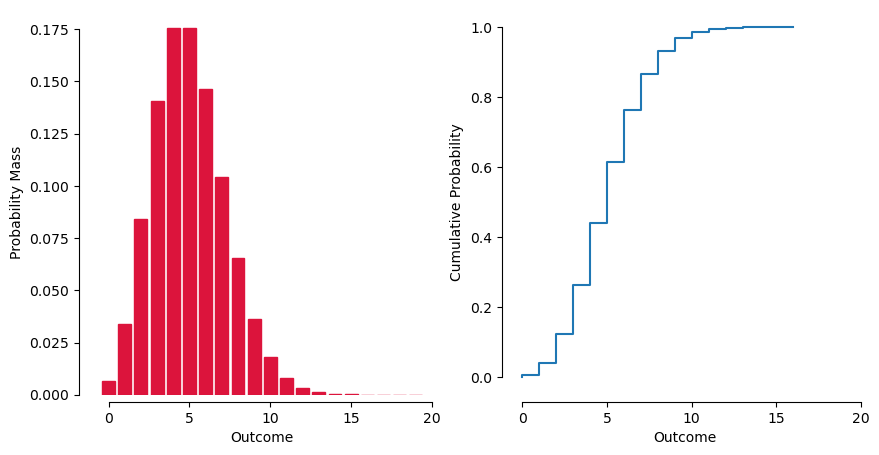

In [4]:
# Example for using Poisson random variables
from scipy.stats import poisson

lambda_ = 5  # rate of events - change this value to see the effect

# Create a Poisson random variable
poi_rv = poisson(mu = lambda_)
# Make two plots to show the PMF and the CDF:
# The first one is a bar chart of the probability mass function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
bplot = ax[0].bar(range(20), poi_rv.pmf(range(20)))

ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Mass")
sns.despine(offset=5, trim=True)
for i, bar in enumerate(bplot):
  bar.set_color("crimson")
xticks = ax[0].get_xticks()

# The second one is a stair plot of the cumulative distribution function
x = np.arange(-1, 3*lambda_+1)
ax[1].step(x+1, poi_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()



### Geometric Distribution
![alt text](figures/image-9.png)

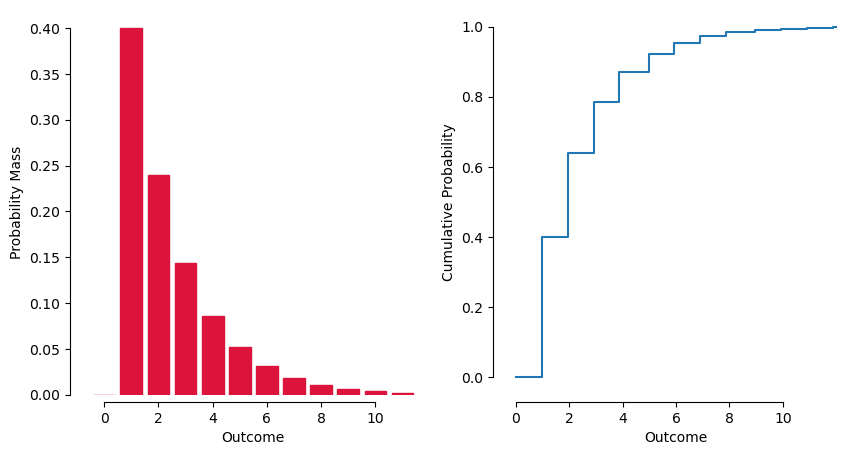

In [5]:
# Example for using Geometric random variables
from scipy.stats import geom

p = 0.4  # probability of success - change this value to see the effect

# Create a Geometric random variable
geo_rv = geom(p = p)

# Make two plots to show the PMF and the CDF:
# The first one is a bar chart of the probability mass function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
bplot = ax[0].bar(range(0, int(5/p)), geo_rv.pmf(range(0, int(5/p))))
# ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Mass")
sns.despine(offset=5, trim=True)
for i, bar in enumerate(bplot):
  bar.set_color("crimson")
xticks = ax[0].get_xticks()

# The second one is a stair plot of the cumulative distribution function
x = np.linspace(0, int(5/p), 100)
ax[1].step(x, geo_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

## Common Continuous Distributions

### Uniform Distribution
![alt text](figures/image-10.png)

A continuous random variable $X$ is said to have a uniform distribution with parameters $a$ and $b$ (with $a< b$), denoted by $X\sim U(a,b)$, if its probability density function is given by
$$
f_X(x) = \frac{
    1
}{
    b-a
}\mathbb{1}(a\leq x \leq b)
$$
where $\mathbb{1}(A)=0$ if statement $A$ is false and $1$ otherwise. This distribution will be essential in implementing stochastic simulation algorithm and Metropolis-Hastings algorithm later in the course.

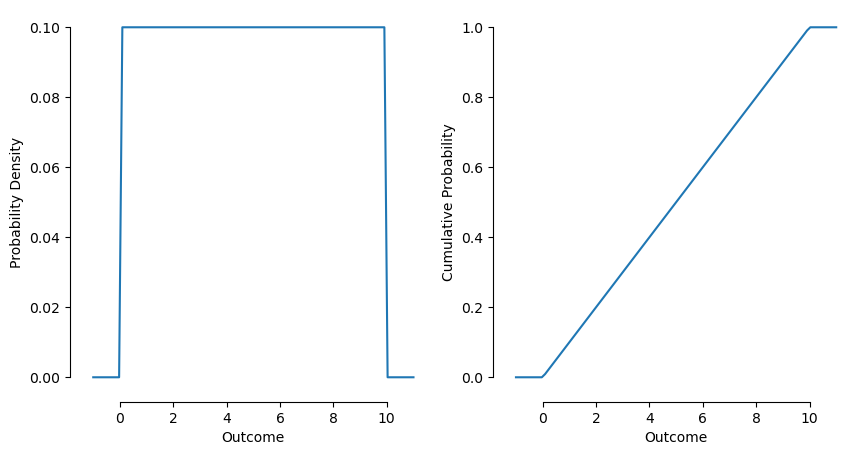

In [6]:
# Example for using Uniform random variables
from scipy.stats import uniform

a = 0  # lower bound - change this value to see the effect
b = 10  # upper bound - change this value to see the effect

# Create a Uniform random variable
uni_rv = uniform(loc = a, scale = b - a)

# Make two plots to show the PDF and the CDF:
# The first one is a line plot of the probability density function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x = np.linspace(a-1, b+1, 100)
ax[0].plot(x, uni_rv.pdf(x))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Density")
sns.despine(offset=5, trim=True)
xticks = ax[0].get_xticks()

# The second one is a line plot of the cumulative distribution function
x = np.linspace(a-1, b+1, 100)
ax[1].plot(x, uni_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

### Exponential Distribution
![alt text](figures/image-11.png)
The exponential distribution will be very important later in the class when we explore the wating times between stochastic events that describe gene regulatory changes.

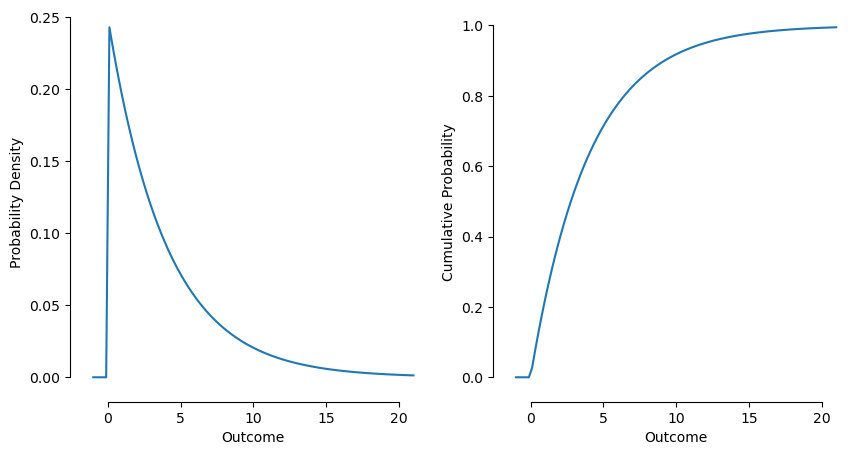

In [7]:
# Example for using Exponential random variables
from scipy.stats import expon

lambda_ = 0.25  # rate of events - change this value to see the effect

# Create an Exponential random variable
exp_rv = expon(scale = 1/lambda_)
# Make two plots to show the PDF and the CDF:
# The first one is a line plot of the probability density function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x = np.linspace(-1, int(5/lambda_+1), 100)
ax[0].plot(x, exp_rv.pdf(x))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Density")
sns.despine(offset=5, trim=True)
xticks = ax[0].get_xticks()

# The second one is a line plot of the cumulative distribution function
x = np.linspace(-1, int(5/lambda_+1), 100)
ax[1].plot(x, exp_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

### Gaussian Distribution

A continuous random variable $X$ has a normal distribution with parameters $\mu$ and $\sigma^2$, written $X\sim N(\mu, \sigma^2)$ if it has probability density function
$$
f_X(x) = \frac{
    1
}{
    \sqrt{2\pi\sigma^2}
}\exp\left(-\frac{
    1
}{
    2
}\left(\frac{
    x-\mu
}{
    \sigma
}\right)^2\right).
$$


An important special case of the normal distribution is the standard normal distribution $N(0,1)$ which has parameters $\mu=0$ and $\sigma^2=1$.

The normal distribution has a very important role in statistics. One reason is that many random quantitites tend to be approximately normally distributed for large sample size. Specifically, the Central Limit Theorem (CLT) states that for random variables $X_1,\ldots, X_n$ that are independent and identically distributed with the same mean $\mu$ and variance $\sigma^2$, and let
$$
\overline{X}:=\frac{
    X_1+\ldots+X_n
}{
    n
}$$
be the sample mean, then the distribution of the random variable $$Z:=\sqrt{n}\left(\frac{
    \overline{X} - \mu
}{
    \sigma
}\right)$$
is well-approximated by a standard normal distribution $N(0,1)$ when $n$ is large.


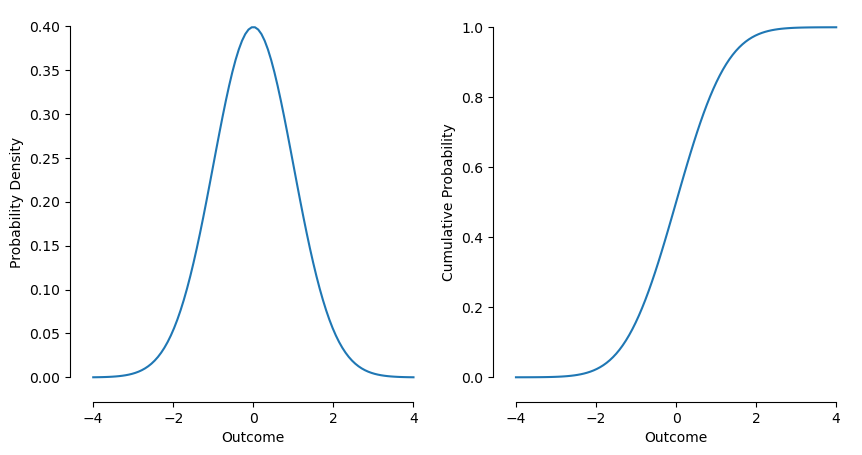

In [8]:
# Example for using Normal random variables
from scipy.stats import norm

mu = 0  # mean - change this value to see the effect
sigma = 1  # standard deviation - change this value to see the effect

# Create a Normal random variable
norm_rv = norm(loc = mu, scale = sigma)

# Make two plots to show the PDF and the CDF:
# The first one is a line plot of the probability density function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x = np.linspace(-mu-4*sigma, mu+4*sigma, 100)
ax[0].plot(x, norm_rv.pdf(x))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Density")
sns.despine(offset=5, trim=True)
xticks = ax[0].get_xticks()

# The second one is a line plot of the cumulative distribution function
ax[1].plot(x, norm_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

# Sampling from distributions

## Sampling From Common Distributions using Numpy

Numpy provides a very nice random sampling library that is widely used throughout scientific computing.

```np.random.____```

| Method    | Description  |
| ----------- | ----------- |
| rand | uniform random from 0 to 1|
| randn | univariate normal from a mean of 0 and a variance of 1 |
| randint| random integers from low to high|
| choice | pick a uniform random value from an array |
| shuffle | shuffles an array along the first axis|

Additionally np.random can sample from a list of statistical distributions, heres a short list:

| Distribution    |
| ----------- |
| [beta](https://en.wikipedia.org/wiki/Beta_distribution) |
| [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) |
| [lognormal](https://en.wikipedia.org/wiki/Log-normal_distribution)|
| [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) |
| [poisson](https://en.wikipedia.org/wiki/Poisson_distribution) |
| [uniform](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) |  
| [power](https://en.wikipedia.org/wiki/Power_law) |


We can additionally set the rng state with np.random.seed(integer)

| Method    | Description  |
| ----------- | ----------- |
| seed | set the seed of the RNG |
| get_state | get the current state of the mersenne twister |

---

```Reading: Kinder, Nelson Section 6.2```

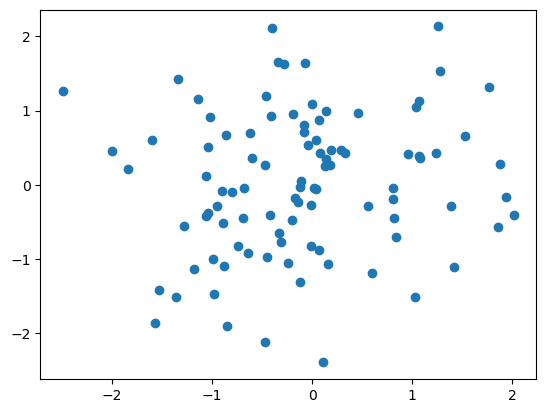

In [9]:
# Generating some simple random data points and plotting them
n = 96 #number of data points to sample

randomNumberGenerator = 'randn' #e.g., "rand", "randn", "randint"
examples_str = {'rand': rng.rand(2,n),
            'randn': rng.randn(2,n),
            'randint': rng.randint(0,1000,size = (2,n))}

# Run the example string to generate the random numbers
random_numbers = examples_str[randomNumberGenerator]

# Plot the random numbers as 2D points
plt.plot(random_numbers[0],random_numbers[1],'o' )

/var/folders/gs/29wgt2xj1jj873ytknj55rsr0000gp/T/ipykernel_61556/2832175815.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  random_numbers = rng.multivariate_normal(np.array([mean1,mean2]), cov, size=n).T


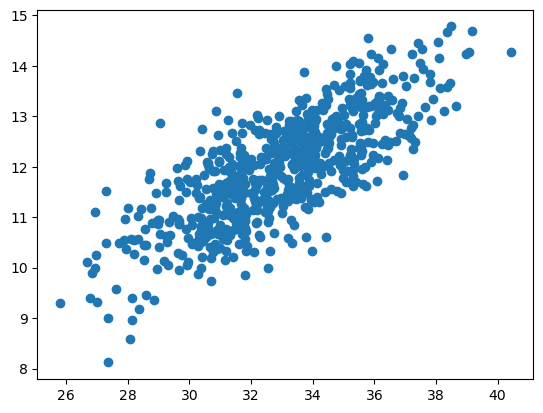

In [10]:
# Generating some multivariate Normal (Gaussian) data points and plotting them
import matplotlib.pyplot as plt
import numpy.random as rng

n = 674     # Number of data points to sample
mean1 = 33  # Mean of the first dimension
mean2 = 12  # Mean of the second dimension
cov = rng.randn(2,2)*3      # Covariance matrix
cov[0,0] = 2; cov[1,1] = 2;

# Generate the data
random_numbers = rng.multivariate_normal(np.array([mean1,mean2]), cov, size=n).T

# Plot the data
plt.plot(random_numbers[0],random_numbers[1],'o' )

[15.46945553  5.11917194  2.55192263  3.66165228  7.20027539  3.80232118
  3.08861361  2.88713874  9.31118179  3.79531303  2.6981572   2.97398713
  7.95505461  6.03114563  3.21365428  7.16674331  2.72677315  5.77281731
  8.61520666  6.51370992  6.81253826  6.78815157  8.37559196  6.96612804
 15.6171441   3.38243215  3.37041859  1.5481363  15.11655993  3.36666401
 12.69678981  2.38432325  4.30845684  2.52097568 10.55976222  4.46693083
  9.93067719  3.71830587  8.54710744  2.90128772  2.08379406 11.98266163
  7.39005531  6.95678188  8.99653487 11.43843969  2.52081003  4.24445984
  4.3557828   1.54822055  9.32594139  4.602177    3.25138768  6.13671781
  3.85563867  1.76616061  6.78406582  8.93715236 19.31679362  6.42648692
  7.28142763 17.16673362 17.2509729   8.39523163  9.80606533 11.38832326
  9.08124363  7.34673076  3.32275969 11.19789648  4.46467618 12.99212716
  6.25906468 11.22455971  4.33405983 10.93817235 11.15252574  2.88156646
  5.03208483  8.5558539  14.53753514 12.02134675 17

/var/folders/gs/29wgt2xj1jj873ytknj55rsr0000gp/T/ipykernel_61556/1989406042.py:14: RuntimeWarning: divide by zero encountered in log
  pdf = np.exp(-(np.log(x)-mean)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))
/var/folders/gs/29wgt2xj1jj873ytknj55rsr0000gp/T/ipykernel_61556/1989406042.py:14: RuntimeWarning: invalid value encountered in divide
  pdf = np.exp(-(np.log(x)-mean)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))


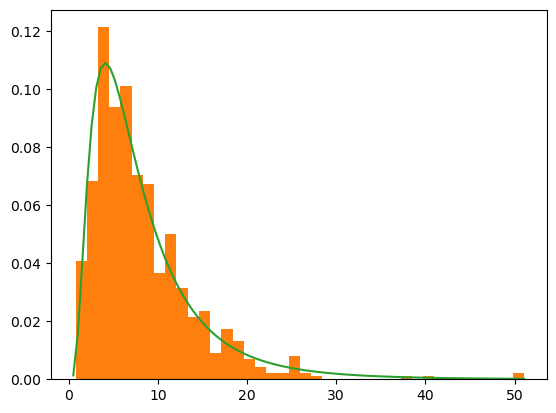

In [17]:
# Creating histograms of log-normal data
n = 781     # Number of data points to sample
mean = 1.9  # Mean of the lognormal distribution
sigma = 0.7 # Log-Standard deviation of the lognormal distribution

# Generate the data
random_numbers = rng.lognormal(mean,sigma, size=(n))

# Plot the histogram of the data
plt.hist(random_numbers,density=True,bins=40 )

# Add the analytical LogNormal PDF to the plot
x = np.linspace(0,max(random_numbers),100)
pdf = np.exp(-(np.log(x)-mean)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))
plt.plot(x,pdf)

The sample mean of the poisson data is 60.39
The sample variance of the poisson data is 55.95790000000001


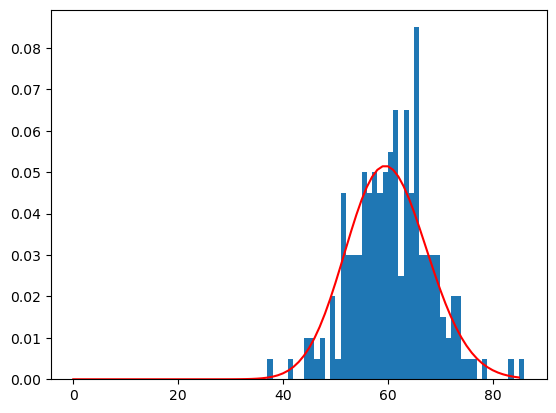

In [12]:
# Creating histogram of some Poisson data
n = 200 # Number of data points to sample
lam = 60 # Poisson parameter (mean)

# Generate the data
random_numbers = rng.poisson(lam, size=(n))

print(f'The sample mean of the poisson data is {np.mean(random_numbers)}')
print(f'The sample variance of the poisson data is {np.var(random_numbers)}')

# Plot histogram of the data and compare it to the Poisson distribution
plt.hist(random_numbers,density=True,bins=range(max(random_numbers)+1), align='mid')

# Add the analytical Poisson distribution to the plot
from scipy.stats import poisson
x = range(max(random_numbers))
plt.plot(x, poisson.pmf(x, lam), 'r-', ms=8, mec='r')

## Sampling arbitrary distributions using the Inverse Transform Sampling method.
![alt text](figures/image-14.png)

### Example for sampling from an arbitrary discrete distribution using the inverse transform method

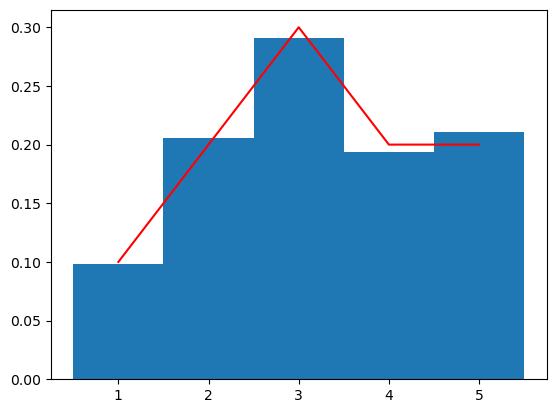

In [13]:
# Example for sampling from an arbitrary discrete distribution using the inverse transform method
# Define the discrete distribution
x = [1, 2, 3, 4, 5] # The outcomes
p = [0.1, 0.2, 0.3, 0.2, 0.2] # The probabilities of the outcomes

# Create the cumulative distribution function
cdf = np.cumsum(p)

# Sample from the distribution
n = 1000
samples = np.zeros(n)
for i in range(n):
    u = rng.rand()
    samples[i] = x[np.argmax(cdf > u)]
    
# Plot the histogram of the samples
plt.hist(samples,density=True,bins=range(1,7), align='left')

# Add the analytical distribution to the plot
plt.plot(x, p, 'r-', ms=8, mec='r')

### Example for sampling from an arbitrary continuous distribution using the inverse transform method

The inverse of the CDF is [2.0*log(-1/(u - 1.0))]


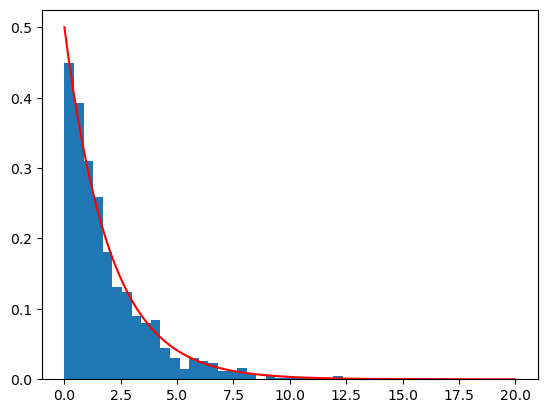

In [18]:
# Example for sampling from an arbitrary continuous distribution using the inverse transform method
# Define the continuous distribution
# Create a probability density function using sympy
x = sym.symbols('x')
lam = 0.5
pdf_sym = lam*sym.exp(-lam*x) # The probability density function

# Create the cumulative distribution function (by integrating the PDF from 0 to x)
cdf_sym = sym.integrate(pdf_sym, (x, 0, x))

# Create the inverse of the cumulative distribution function (by solving the relation "u = CDF(x)" for x)
cdf_inv_sym = sym.solve(cdf_sym - sym.symbols('u'), x)

print(f'The inverse of the CDF is {cdf_inv_sym}')

# Create a function to convert uniform random numbers U(0,1) to samples from the distribution
sample = sym.lambdify(sym.symbols('u'), cdf_inv_sym)

# Sample from the distribution
n = 1000
samples = sample(rng.rand(n))

# Plot the histogram of the samples
plt.hist(samples,density=True,bins=40)

# Add the analytical distribution to the plot
x = np.linspace(0,20,100)
pdf = lam*np.exp(-lam*x)
plt.plot(x, pdf, 'r-', ms=8, mec='r')

# Computing expectations from distributons and summary statistics from samples
![alt text](figures/image-12.png)
![alt text](figures/image-13.png)

In [20]:
# Examples for computing expected values (means and variances) from a discrete distribution

# Try one of the following discrete distributions
dist = binom(n = 20, p = 0.3) # Create a Poisson distribution with lambda = 5
# dist = poisson(mu = 5) # Create a Poisson distribution with lambda = 5
# dist = geom(p = 0.53) # Create a Poisson distribution with lambda = 5

f = lambda x: x**1.3 # Create a function to compute the expected value of. E.g., f(x) = x^(1.3)
distRange = np.arange(25) # Create a range of values from 0 to 19

pdf = dist.pmf(distRange) # Compute the PMF of the distribution
mean = np.sum(pdf*distRange) # Compute the mean of the distribution
variance = np.sum(pdf*(distRange-mean)**2) # Compute the variance of the distribution    
f_mean = np.sum(pdf*f(distRange)) # Compute the expected value of f(x)

print(f'The computed mean of this distribution is {mean}')
print(f'The computed variance of this distribution is {variance}')
print(f'The computed mean of function f(x) is {f_mean}')

# Compare to the built-in methods
print(f'The mean of this distribution is {dist.mean()}')
print(f'The variance of this distribution is {dist.var()}')

# Now let's sample from the distribution and compute the sample mean and variance
n = 1000 # Number of samples to draw
samples = dist.rvs(size=n) # Draw n samples from the distribution   
sampleMean = np.mean(samples) # Compute the sample mean 
sampleVariance = np.var(samples) # Compute the sample variance  
samplefMean = np.mean(f(samples)) # Compute the sample mean of f(x)

print(f'The sample mean of this distribution for {n} samples is {sampleMean}')
print(f'The sample variance of this distribution for {n} samples is  {sampleVariance}')
print(f'The sample mean of function f(x) for {n} samples is {samplefMean}')

The computed mean of this distribution is 5.999999999999998
The computed variance of this distribution is 4.199999999999996
The computed mean of function f(x) is 10.509371983392828
The mean of this distribution is 6.0
The variance of this distribution is 4.199999999999999
The sample mean of this distribution for 1000 samples is 5.881
The sample variance of this distribution for 1000 samples is  4.208839000000001
The sample mean of function f(x) for 1000 samples is 10.24612548784108


In [25]:
# Examples for computing expected values (means and variances) from a continuous distribution

# Try one of the following continuous distributions
dist = uniform(loc = 0, scale = 10) # Create a Uniform distribution with a = 0 and b = 10
# dist = expon(scale = 1/3) # Create a Exponential distribution with lambda = 3
# dist = norm(loc = -3, scale = 2) # Create a Normal distribution with mean = -3 and standard deviation = 2 

f = lambda x: x**4 # Create a function to compute the expected value of. E.g., f(x) = x^(4)

distRange = np.linspace(-30,30,10000) # Create a range of values from 0 to 19
stepSize = distRange[1]-distRange[0] # Compute the step size of the range

pdf = dist.pdf(distRange) # Compute the PDF of the distribution
mean = np.sum(pdf*distRange)*stepSize # Compute the mean of the distribution
variance = np.sum(pdf*(distRange-mean)**2)*stepSize  # Compute the variance of the distribution    
f_mean = np.sum(pdf*f(distRange))*stepSize # Compute the expected value of f(x)

print(f'The computed mean of this distribution is {mean}')
print(f'The computed variance of this distribution is {variance}')
print(f'The computed mean of function f(x) is {f_mean}')

# Compare to the built-in methods
print(f'The mean of this distribution is {dist.mean()}')
print(f'The variance of this distribution is {dist.var()}')

# Now let's sample from the distribution and compute the sample mean and variance
n = 1000 # Number of samples to draw
samples = dist.rvs(size=n) # Draw n samples from the distribution   
sampleMean = np.mean(samples) # Compute the sample mean 
sampleVariance = np.var(samples) # Compute the sample variance  
samplefMean = np.mean(f(samples)) # Compute the sample mean of f(x)

print(f'The sample mean of this distribution for {n} samples is {sampleMean}')
print(f'The sample variance of this distribution for {n} samples is  {sampleVariance}')
print(f'The sample mean of function f(x) for {n} samples is {samplefMean}')

The computed mean of this distribution is 5.003000750119569
The computed variance of this distribution is 8.340835585058656
The computed mean of function f(x) is 2003.001500269815
The mean of this distribution is 5.0
The variance of this distribution is 8.333333333333332
The sample mean of this distribution for 1000 samples is 5.075225503500299
The sample variance of this distribution for 1000 samples is  8.010215681459917
The sample mean of function f(x) for 1000 samples is 1995.2590753092284
